In [ ]:
pip install mp-api


In [ ]:
from mp_api.client import MPRester
import requests
import logging

# Set logging level to ERROR to suppress INFO logs including the loading bar
logging.getLogger("mp_api").setLevel(logging.ERROR)

In [ ]:
import pandas as pd
import numpy as np

with MPRester("lBZg9sC9Y2fLyEjv7aP1X4SspH9OKIKd") as mpr:
  docs = mpr.summary.search(elements=["Ge"], fields=["material_id", "band_gap","formula_pretty"])
  mpids = [doc.material_id for doc in docs]

def descriptors(cif):

    atomic_numbers = []

    distance_matrix = []
    van_der_waals_radius = []
    electrical_resistivity = []
    velocity_of_sound = []
    reflectivity = []
    poissons_ratio = []
    molar_volume = []
    thermal_conductivity = []
    melting_point = []
    critical_temperature = []
    superconduction_temperature = []
    liquid_range = []
    bulk_modulus = []
    youngs_modulus = []
    brinell_hardness = []
    rigidity_modulus = []
    # mineral_hardness = []
    vickers_hardness = []
    density_of_solid = []
    coefficient_of_linear_thermal_expansion = []
    average_ionic_radius = []
    average_cationic_radius = []
    average_anionic_radius = []


    full_structure = mpr.get_structure_by_material_id(cif.material_id)

    structure = full_structure[0]

    numElements = len(full_structure.atomic_numbers)

    num_metals = 0
    for e in structure.species:
        if e.Z in range(3, 4+1) or e.Z in range(11, 12+1) or e.Z in range(19, 30+1) or e.Z in range(37, 48+1) or e.Z in range(55, 80 + 1) or e.Z in range(87, 112+1):
            num_metals += 1
    metals_fraction = num_metals/numElements

    spg = full_structure.get_space_group_info()

    spacegroup_numbers = {}
    for i in range(1, 231):
        spacegroup_numbers[i] = 0

    spacegroup_numbers[spg[1]] = 1

    spacegroup_numbers_list = []
    for i in range(1, 231):
        spacegroup_numbers_list += [spacegroup_numbers[i]]

    atomic_numbers = [np.mean(full_structure.atomic_numbers), np.max(full_structure.atomic_numbers), np.min(
        full_structure.atomic_numbers), np.std(full_structure.atomic_numbers)]

    # Lattice parameters:
    a_parameters = structure.lattice.abc[0]
    b_parameters = structure.lattice.abc[1]
    c_parameters = structure.lattice.abc[2]
    alpha_parameters = structure.lattice.angles[0]
    beta_parameters = structure.lattice.angles[1]
    gamma_parameters = structure.lattice.angles[2]

    distance_matrix += [np.mean(full_structure.distance_matrix), np.max(full_structure.distance_matrix),
                        np.min(full_structure.distance_matrix), np.std(full_structure.distance_matrix)]

    e1, e2, e3, e4, e5, e6, e7, e8, e9, e10, e11, e12, e13, e14, e15, e16, e17, e18, e19, e20, e21, e22, e23 = [
    ], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], []
    for e in structure.species:
        e1 += [e.van_der_waals_radius]
        e2 += [e.electrical_resistivity]
        e3 += [e.velocity_of_sound]
        e4 += [e.reflectivity]
        e6 += [e.poissons_ratio]
        e7 += [e.molar_volume]
        e8 += [e.thermal_conductivity]
        e9 += [e.melting_point]
        e10 += [e.critical_temperature]
        e11 += [e.superconduction_temperature]
        e12 += [e.liquid_range]
        e13 += [e.bulk_modulus]
        e14 += [e.youngs_modulus]
        e15 += [e.brinell_hardness]
        e16 += [e.rigidity_modulus]
        # e17 +=[e.mineral_hardness ]
        e18 += [e.vickers_hardness]
        e19 += [e.density_of_solid]
        e20 += [e.coefficient_of_linear_thermal_expansion]
        e21 += [e.average_ionic_radius]
        e22 += [e.average_cationic_radius]
        e23 += [e.average_anionic_radius]

    e1 = [0 if v is None else v for v in e1]
    e2 = [0 if v is None else v for v in e2]
    e3 = [0 if v is None else v for v in e3]
    e4 = [0 if v is None else v for v in e4]
    # e5=[0 if v is None else v for v in e5]
    e6 = [0 if v is None else v for v in e6]
    e7 = [0 if v is None else v for v in e7]
    e8 = [0 if v is None else v for v in e8]
    e9 = [0 if v is None else v for v in e9]
    e10 = [0 if v is None else v for v in e10]
    e11 = [0 if v is None else v for v in e11]
    e12 = [0 if v is None else v for v in e12]
    e13 = [0 if v is None else v for v in e13]
    e14 = [0 if v is None else v for v in e14]
    e15 = [0 if v is None else v for v in e15]
    e16 = [0 if v is None else v for v in e16]
    # e17=[0 if v is None else v for v in e17]
    e18 = [0 if v is None else v for v in e18]
    e19 = [0 if v is None else v for v in e19]
    e20 = [0 if v is None else v for v in e20]
    e21 = [0 if v is None else v for v in e21]
    e22 = [0 if v is None else v for v in e22]
    e23 = [0 if v is None else v for v in e23]

    van_der_waals_radius = [np.mean(e1), np.max(e1), np.min(e1), np.std(e1)]
    electrical_resistivity = [np.mean(e2), np.max(e2), np.min(e2), np.std(e2)]
    velocity_of_sound = [np.mean(e3), np.max(e3), np.min(e3), np.std(e3)]
    reflectivity = [np.mean(e4), np.max(e4), np.min(e4), np.std(e4)]
    poissons_ratio = [np.mean(e6), np.max(e6), np.min(e6), np.std(e6)]
    molar_volume = [np.mean(e7), np.max(e7), np.min(e7), np.std(e7)]
    thermal_conductivity = [np.mean(e8), np.max(e8), np.min(e8), np.std(e8)]
    melting_point = [np.mean(e9), np.max(e9), np.min(e9), np.std(e9)]
    critical_temperature = [np.mean(e10), np.max(
        e10), np.min(e10), np.std(e10)]
    superconduction_temperature = [
        np.mean(e11), np.max(e11), np.min(e11), np.std(e11)]
    liquid_range = [np.mean(e12), np.max(e12), np.min(e12), np.std(e12)]
    bulk_modulus = [np.mean(e13), np.max(e13), np.min(e13), np.std(e13)]
    youngs_modulus = [np.mean(e14), np.max(e14), np.min(e14), np.std(e14)]
    brinell_hardness = [np.mean(e15), np.max(e15), np.min(e15), np.std(e15)]
    rigidity_modulus = [np.mean(e16), np.max(e16), np.min(e16), np.std(e16)]
    vickers_hardness = [np.mean(e18), np.max(e18), np.min(e18), np.std(e18)]
    density_of_solid = [np.mean(e19), np.max(e19), np.min(e19), np.std(e19)]
    coefficient_of_linear_thermal_expansion = [
        np.mean(e20), np.max(e20), np.min(e20), np.std(e20)]
    average_ionic_radius = [np.mean(e21), np.max(
        e21), np.min(e21), np.std(e21)]
    average_cationic_radius = [
        np.mean(e22), np.max(e22), np.min(e22), np.std(e22)]
    average_anionic_radius = [
        np.mean(e23), np.max(e23), np.min(e23), np.std(e23)]

    V = full_structure.volume

    volume_per_atom = V / numElements

    atom_volume = 0
    for e in structure.species:
        atom_volume += 4/3*np.pi*e.average_ionic_radius**3
    empty_volume = V - atom_volume

    descriptors_dict = {
        "atomic_numbers": atomic_numbers,
        "volume_per_atom": [volume_per_atom],
        "empty_volume": [empty_volume],
        "metals_fraction": [metals_fraction],
        "distance_matrix": distance_matrix,
        "van_der_waals_radius": van_der_waals_radius,
        "electrical_resistivity": electrical_resistivity,
        "velocity_of_sound": velocity_of_sound,
        "reflectivity": reflectivity,
        "poissons_ratio": poissons_ratio,
        "molar_volume": molar_volume,
        "thermal_conductivity": thermal_conductivity,
        "melting_point": melting_point,
        "critical_temperature": critical_temperature,
        "superconduction_temperature": superconduction_temperature,
        "liquid_range": liquid_range,
        "bulk_modulus": bulk_modulus,
        "youngs_modulus": youngs_modulus,
        "brinell_hardness": brinell_hardness,
        "rigidity_modulus": rigidity_modulus,
        "vickers_hardness": vickers_hardness,
        "density_of_solid": density_of_solid,
        "coefficient_of_linear_thermal_expansion": coefficient_of_linear_thermal_expansion,
        "average_ionic_radius": average_ionic_radius,
        "average_cationic_radius": average_cationic_radius,
        "average_anionic_radius": average_anionic_radius,
        "spacegroup_numbers": spacegroup_numbers_list
    }
    return descriptors_dict


In [ ]:
type(docs)
print(len(docs[:5001]))

In [ ]:
sample_df= descriptors(docs[0])


Retrieving MaterialsDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/pymatgen/core/periodic_table.py:205: UserWarning: No data available for critical_temperature for Ni
  warnings.warn(f"No data available for {item} for {self.symbol}")
/usr/local/lib/python3.10/dist-packages/pymatgen/core/periodic_table.py:205: UserWarning: No data available for superconduction_temperature for Ni
  warnings.warn(f"No data available for {item} for {self.symbol}")


In [ ]:
sample_df


{'atomic_numbers': [29.0, 32, 28, 1.7320508075688772],
 'volume_per_atom': [10.999866997861842],
 'empty_volume': [42.302069669503005],
 'metals_fraction': [0.25],
 'distance_matrix': [1.872242390008728,
  2.4963238961419565,
  0.0,
  1.0809396478598547],
 'van_der_waals_radius': [1.97, 1.97, 1.97, 0.0],
 'electrical_resistivity': [7.2e-08, 7.2e-08, 7.2e-08, 0.0],
 'velocity_of_sound': [4970.0, 4970.0, 4970.0, 0.0],
 'reflectivity': [72.0, 72.0, 72.0, 0.0],
 'poissons_ratio': [0.31, 0.31, 0.31, 0.0],
 'molar_volume': [6.59, 6.59, 6.59, 0.0],
 'thermal_conductivity': [91.0, 91.0, 91.0, 0.0],
 'melting_point': [1728.0, 1728.0, 1728.0, 0.0],
 'critical_temperature': [0.0, 0, 0, 0.0],
 'superconduction_temperature': [0.0, 0, 0, 0.0],
 'liquid_range': [1458.0, 1458.0, 1458.0, 0.0],
 'bulk_modulus': [180.0, 180.0, 180.0, 0.0],
 'youngs_modulus': [200.0, 200.0, 200.0, 0.0],
 'brinell_hardness': [700.0, 700.0, 700.0, 0.0],
 'rigidity_modulus': [76.0, 76.0, 76.0, 0.0],
 'vickers_hardness': [638

In [ ]:
def uneven_dict_converter(output):

    return pd.DataFrame({keys:[values] for keys,values in output.items()})

In [ ]:
df = uneven_dict_converter(sample_df)

In [ ]:
df

,atomic_numbers,volume_per_atom,empty_volume,metals_fraction,distance_matrix,van_der_waals_radius,electrical_resistivity,velocity_of_sound,reflectivity,poissons_ratio,...,youngs_modulus,brinell_hardness,rigidity_modulus,vickers_hardness,density_of_solid,coefficient_of_linear_thermal_expansion,average_ionic_radius,average_cationic_radius,average_anionic_radius,spacegroup_numbers
0,"[29.0, 32, 28, 1.7320508075688772]",[10.999866997861842],[42.302069669503005],[0.25],"[1.872242390008728, 2.4963238961419565, 0.0, 1...","[1.97, 1.97, 1.97, 0.0]","[7.2e-08, 7.2e-08, 7.2e-08, 0.0]","[4970.0, 4970.0, 4970.0, 0.0]","[72.0, 72.0, 72.0, 0.0]","[0.31, 0.31, 0.31, 0.0]",...,"[200.0, 200.0, 200.0, 0.0]","[700.0, 700.0, 700.0, 0.0]","[76.0, 76.0, 76.0, 0.0]","[638.0, 638.0, 638.0, 0.0]","[8908.0, 8908.0, 8908.0, 0.0]","[1.34e-05, 1.34e-05, 1.34e-05, 0.0]","[0.74, 0.74, 0.74, 0.0]","[0.74, 0.74, 0.74, 0.0]","[0.0, 0.0, 0.0, 0.0]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."


In [ ]:
output_df = pd.DataFrame(columns=df.columns)

In [ ]:
output_df

,atomic_numbers,volume_per_atom,empty_volume,metals_fraction,distance_matrix,van_der_waals_radius,electrical_resistivity,velocity_of_sound,reflectivity,poissons_ratio,...,youngs_modulus,brinell_hardness,rigidity_modulus,vickers_hardness,density_of_solid,coefficient_of_linear_thermal_expansion,average_ionic_radius,average_cationic_radius,average_anionic_radius,spacegroup_numbers


In [ ]:
!pip install tqdm

In [ ]:
from tqdm.auto import tqdm

In [ ]:
band_gaps = []
formula = []

for r in tqdm(docs[:1000]):
    bg = r.band_gap
    fl = r.formula_pretty

    full_structure = mpr.get_structure_by_material_id(r.material_id)
    structure = full_structure[0]

    output_df = pd.concat([output_df, pd.DataFrame(uneven_dict_converter(descriptors(r)))], ignore_index=True)

    band_gaps += [bg]
    formula += [fl]

# dataset_df = pd.DataFrame(dataset)


In [ ]:
for r in tqdm(docs[1000:2000]):
    bg = r.band_gap
    fl = r.formula_pretty

    full_structure = mpr.get_structure_by_material_id(r.material_id)
    structure = full_structure[0]

    output_df = pd.concat([output_df, pd.DataFrame(uneven_dict_converter(descriptors(r)))], ignore_index=True)

    band_gaps += [bg]
    formula += [fl]

In [ ]:
for r in tqdm(docs[2000:3000]):
    bg = r.band_gap
    fl = r.formula_pretty

    full_structure = mpr.get_structure_by_material_id(r.material_id)
    structure = full_structure[0]

    output_df = pd.concat([output_df, pd.DataFrame(uneven_dict_converter(descriptors(r)))], ignore_index=True)

    band_gaps += [bg]
    formula += [fl]

In [ ]:
for r in tqdm(docs[3000:4000]):
    bg = r.band_gap
    fl = r.formula_pretty

    full_structure = mpr.get_structure_by_material_id(r.material_id)
    structure = full_structure[0]

    output_df = pd.concat([output_df, pd.DataFrame(uneven_dict_converter(descriptors(r)))], ignore_index=True)

    band_gaps += [bg]
    formula += [fl]

In [ ]:
for r in tqdm(docs[4000:5000]):
    bg = r.band_gap
    fl = r.formula_pretty

    full_structure = mpr.get_structure_by_material_id(r.material_id)
    structure = full_structure[0]

    output_df = pd.concat([output_df, pd.DataFrame(uneven_dict_converter(descriptors(r)))], ignore_index=True)

    band_gaps += [bg]
    formula += [fl]

In [ ]:
final_df = pd.concat([output_df, pd.DataFrame({ 'formula': formula, 'band_gap': band_gaps})], axis=1)

In [ ]:
final_df.to_csv('GermaniumProjectBandgap_dataset.csv', index=False)

In [ ]:
final_df

,atomic_numbers,volume_per_atom,empty_volume,metals_fraction,distance_matrix,van_der_waals_radius,electrical_resistivity,velocity_of_sound,reflectivity,poissons_ratio,...,rigidity_modulus,vickers_hardness,density_of_solid,coefficient_of_linear_thermal_expansion,average_ionic_radius,average_cationic_radius,average_anionic_radius,spacegroup_numbers,formula,band_gap
0,"[29.0, 32, 28, 1.7320508075688772]",[10.999866997861842],[42.302069669503005],[0.25],"[1.872242390008728, 2.4963238961419565, 0.0, 1...","[1.97, 1.97, 1.97, 0.0]","[7.2e-08, 7.2e-08, 7.2e-08, 0.0]","[4970.0, 4970.0, 4970.0, 0.0]","[72.0, 72.0, 72.0, 0.0]","[0.31, 0.31, 0.31, 0.0]",...,"[76.0, 76.0, 76.0, 0.0]","[638.0, 638.0, 638.0, 0.0]","[8908.0, 8908.0, 8908.0, 0.0]","[1.34e-05, 1.34e-05, 1.34e-05, 0.0]","[0.74, 0.74, 0.74, 0.0]","[0.74, 0.74, 0.74, 0.0]","[0.0, 0.0, 0.0, 0.0]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",Ni3Ge,0.0000
1,"[56.333333333333336, 92, 32, 25.772509040103607]",[18.95915721643042],[223.43009282866632],[0.08333333333333333],"[3.15220689729261, 5.418956353239965, 0.0, 1.2...","[2.41, 2.41, 2.41, 0.0]","[2.8e-07, 2.8e-07, 2.8e-07, 0.0]","[3155.0, 3155.0, 3155.0, 0.0]","[0.0, 0, 0, 0.0]","[0.23, 0.23, 0.23, 0.0]",...,"[111.0, 111.0, 111.0, 0.0]","[1960.0, 1960.0, 1960.0, 0.0]","[19050.0, 19050.0, 19050.0, 0.0]","[1.39e-05, 1.39e-05, 1.39e-05, 0.0]","[0.9912500000000001, 0.9912500000000001, 0.991...","[0.9912500000000001, 0.9912500000000001, 0.991...","[0.0, 0.0, 0.0, 0.0]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",UGeRh,0.0000
2,"[29.25, 80, 16, 20.26542622300355]",[19.74180808610357],[313.55936450002446],[0.0625],"[3.427187305628695, 5.678819379079515, 0.0, 1....","[1.96, 1.96, 1.96, 0.0]","[1.72e-08, 1.72e-08, 1.72e-08, 0.0]","[3570.0, 3570.0, 3570.0, 0.0]","[90.0, 90.0, 90.0, 0.0]","[0.34, 0.34, 0.34, 0.0]",...,"[48.0, 48.0, 48.0, 0.0]","[369.0, 369.0, 369.0, 0.0]","[8920.0, 8920.0, 8920.0, 0.0]","[1.65e-05, 1.65e-05, 1.65e-05, 0.0]","[0.82, 0.82, 0.82, 0.0]","[0.82, 0.82, 0.82, 0.0]","[0.0, 0.0, 0.0, 0.0]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",Cu2HgGeS4,0.0456
3,"[14.470588235294118, 72, 8, 15.575688624409752]",[14.375479113179015],[1463.7264287597452],[0.00980392156862745],"[6.718147073366523, 11.982054581629434, 0.0, 2...","[2.23, 2.23, 2.23, 0.0]","[3.4e-07, 3.4e-07, 3.4e-07, 0.0]","[3010.0, 3010.0, 3010.0, 0.0]","[0.0, 0, 0, 0.0]","[0.37, 0.37, 0.37, 0.0]",...,"[30.0, 30.0, 30.0, 0.0]","[1760.0, 1760.0, 1760.0, 0.0]","[13310.0, 13310.0, 13310.0, 0.0]","[5.9e-06, 5.9e-06, 5.9e-06, 0.0]","[0.85, 0.85, 0.85, 0.0]","[0.85, 0.85, 0.85, 0.0]","[0.0, 0.0, 0.0, 0.0]","[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",HfSiGe(SO6)2,2.0600
4,"[27.6, 55, 17, 14.880860190190619]",[32.58505510348421],[138.08683449970079],[0.2],"[2.6967695862537284, 4.60411984291327, 0.0, 1....","[3.43, 3.43, 3.43, 0.0]","[2.1e-07, 2.1e-07, 2.1e-07, 0.0]","[0.0, 0, 0, 0.0]","[0.0, 0, 0, 0.0]","[0.0, 0, 0, 0.0]",...,"[0.0, 0, 0, 0.0]","[0.0, 0, 0, 0.0]","[1879.0, 1879.0, 1879.0, 0.0]","[0.0, 0, 0, 0.0]","[1.81, 1.81, 1.81, 0.0]","[1.81, 1.81, 1.81, 0.0]","[0.0, 0.0, 0.0, 0.0]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",CsGeCl3,2.1535
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,"[39.23076923076923, 56, 7, 17.59874928315535]",[29.795274881151826],[760.8208425408146],[0.038461538461538464],"[5.878830847240403, 10.835944636872714, 0.0, 2...","[2.68, 2.68, 2.68, 0.0]","[3.4e-07, 3.4e-07, 3.4e-07, 0.0]","[1620.0, 1620.0, 1620.0, 0.0]","[0.0, 0, 0, 0.0]","[0.0, 0, 0, 0.0]",...,"[4.9, 4.9, 4.9, 0.0]","[0.0, 0, 0, 0.0]","[3510.0, 3510.0, 3510.0, 0.0]","[2.06e-05, 2.06e-05, 2.06e-05, 0.0]","[1.49, 1.49, 1.49, 0.0]","[1.49, 1.49, 1.49, 0.0]","[0.0, 0.0, 0.0, 0.0]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",Ba6Ge5N2,0.0000
4996,"[18.0, 32, 7, 11.86029791643813]",[13.700541009734584],[1642.1649910194724],[0.008333333333333333],"[5.76583516058468, 9.701511335811967, 0.0, 1.7...","[

5000
[0.0, 0.0, 0.04560000000000031, 2.0599999999999996, 2.1534999999999997, 0.0, 0.0, 1.5788000000000002, 0.0, 0.0, 0.0, 3.3011000000000004, 0.0, 0.0, 0.0, 0.0, 2.1265, 2.8717, 0.0, 1.4132000000000002, 0.0, 0.0, 0.0, 3.8436999999999992, 0.0, 1.9161000000000001, 1.0195999999999996, 3.4877000000000002, 0.0, 0.9342000000000001, 2.742, 0.0, 0.29579999999999984, 1.8390000000000002, 1.9186, 4.058400000000001, 0.0, 1.3131000000000002, 0.0, 0.0, 0.04699999999999971, 0.0, 0.0, 1.996, 0.0, 2.5603000000000002, 0.0, 0.0, 1.3136999999999999, 0.0, 2.1227, 0.0, 2.0632, 0.0, 0.0, 1.7359, 0.0, 0.0, 0.0, 1.9847000000000001, 0.8817999999999997, 0.0, 0.11109999999999953, 2.5421, 0.0, 1.0491000000000001, 0.8220000000000001, 1.8880999999999997, 1.2867, 3.098, 2.4351000000000003, 0.0, 0.017699999999999994, 0.0, 2.6323, 1.7463999999999997, 0.0, 0.0, 0.0, 0.0, 0.0, 1.5042999999999997, 3.5987999999999998, 3.9614000000000003, 1.7867, 2.3243, 0.0, 0.0, 0.0, 3.9886999999999997, 0.0, 0.0, 0.0, 0.0, 0.5090999999999

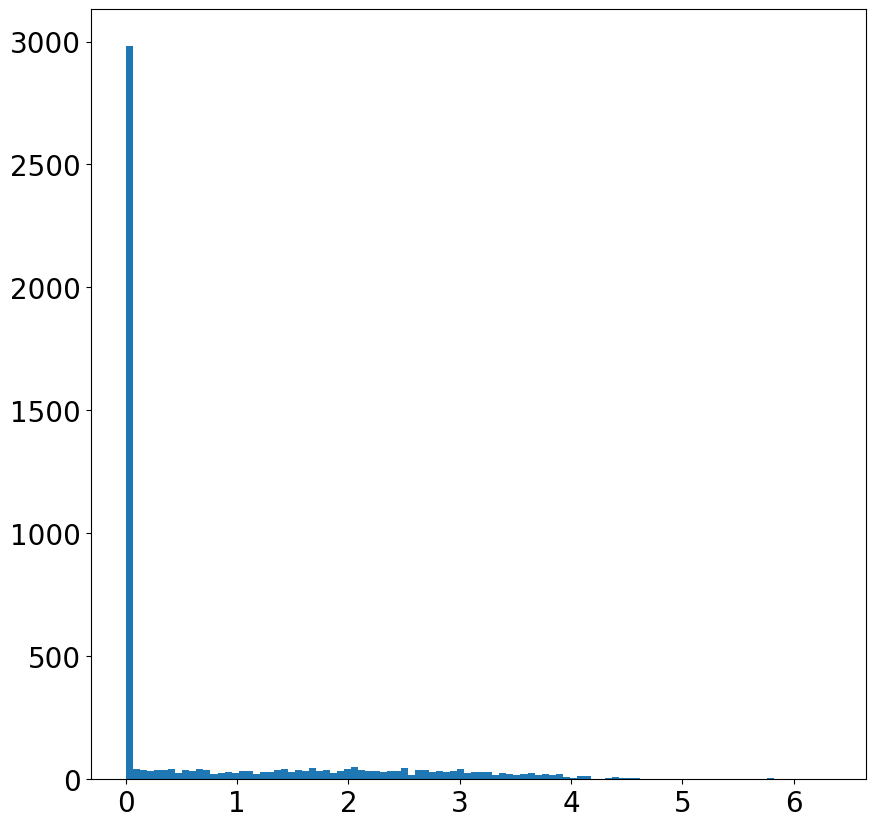

In [ ]:
import matplotlib.pyplot as plt

plt.rcParams.update({'font.size': 20})
band_gaps = [bg for bg in band_gaps if bg is not None]
print(len(band_gaps))

print(band_gaps)

plt.figure(figsize=(10, 10))
plt.hist(band_gaps, bins=100)
plt.savefig('Histogram_PDF', bbox_inches='tight')

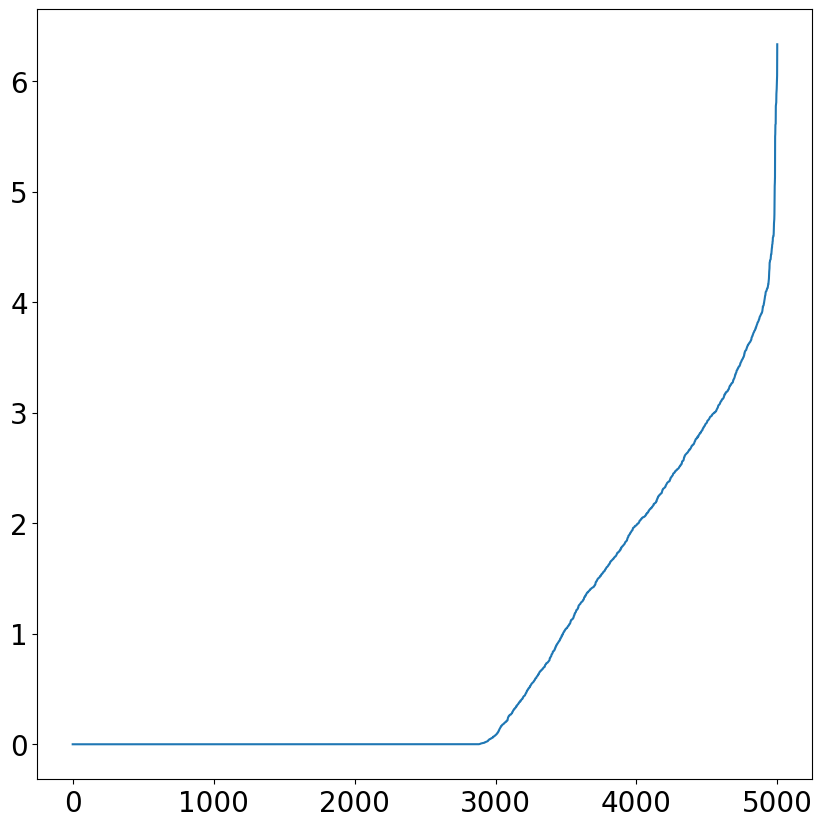

In [ ]:
band_gaps_sorted=sorted(band_gaps)

# Scatter plot
plt.figure(figsize=(10,10))
plt.plot(band_gaps_sorted)
plt.ylabel('')
plt.xlabel('')
plt.savefig('ScatterPlot', bbox_inches='tight')